In [1]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import math 

from sklearn.preprocessing import MinMaxScaler

plt.rcParams["figure.figsize"] = (10,8) 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

Comentario. En la segunda iteración de este proceso, cambiamos la variable respuesta. Nuestra variable respuesta ya es normal, entonces, a modo de ejercicio académico dejamos los resultados que hicimos en la primera iteración cuando intentamos normalizar "age".

In [34]:
df = pd.read_csv("Datos/possum2.csv", index_col = 0)
df.head()

,index,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


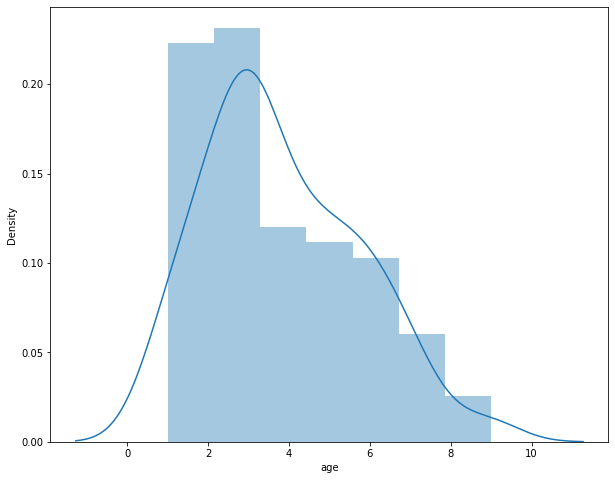

In [3]:
# lo podemos hacer con un displot
sns.distplot(df["age"]);

In [4]:
stats.shapiro(df["age"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [5]:
# Nuestra variable respuesta "age" no seguía una distribución normal, tenemos que normalizarla. Vamos a escoger para empezar manualmente

In [6]:

media = df["age"].mean()
maximo = df["age"].max() 
minimo = df["age"].min()

In [7]:
df["age_norm"] = (df["age"] - media) / (maximo - minimo )

/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


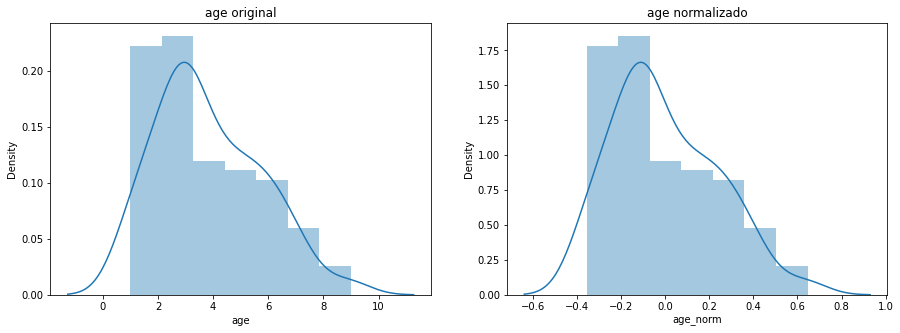

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age original')
axes[1].set_title('age normalizado')

sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df["age_norm"], ax = axes[1]);

In [9]:
stats.shapiro(df["age_norm"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [10]:
# No nos cambia nada la distribución

In [11]:
df["age_log"] = df["age"].apply(lambda x: np.log(x) if x > 0 else 0)

In [12]:
df.head(2)

,index,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_norm,age_log
0,0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.520833,2.079442
1,1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0.270833,1.791759


/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


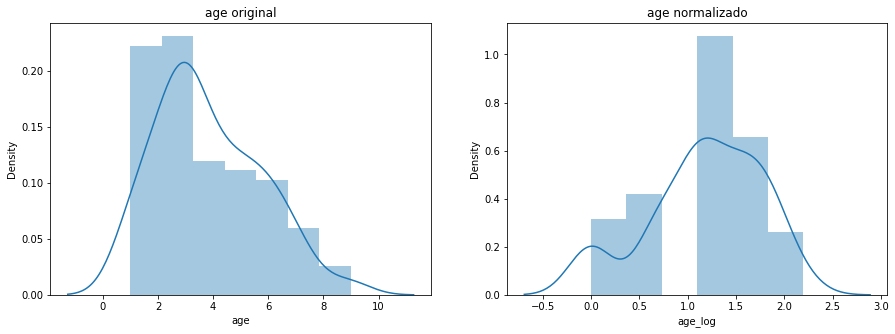

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age original')
axes[1].set_title('age normalizado')

sns.distplot(df["age"] ,ax = axes[0])
sns.distplot(df["age_log"], ax = axes[1]);

In [14]:
stats.shapiro(df["age_log"])

ShapiroResult(statistic=0.9215227365493774, pvalue=1.1837032616313081e-05)

In [15]:
# Todavía no alcanzamos la distribución normal

In [16]:
# probamos con raíces cuadradas

In [17]:
df["age_raiz"] = df["age"].apply(lambda x: math.sqrt(x))

/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


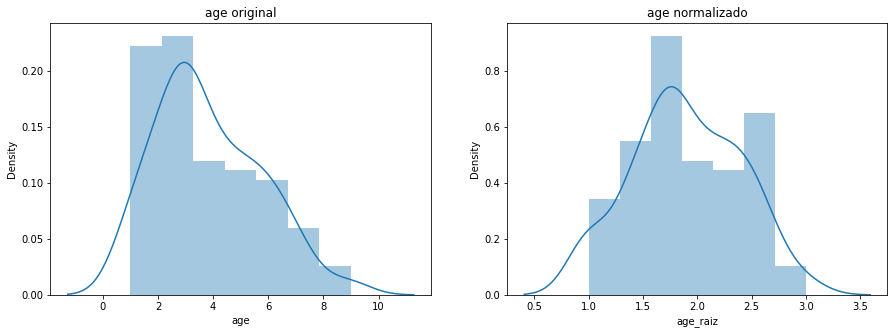

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age original')
axes[1].set_title('age normalizado')

sns.distplot(df["age"] ,ax = axes[0])
sns.distplot(df["age_raiz"], ax = axes[1]);

In [19]:
stats.shapiro(df["age_raiz"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [20]:
# Este se acarca mucho más a una distribución normal

In [21]:
#Probamos con maxminscaller

In [22]:
minmax = MinMaxScaler()

In [23]:
minmax.fit(df[['age']])

MinMaxScaler()

In [24]:
X_normalizadas = minmax.transform(df[["age"]])

In [25]:
X_normalizadas.min(axis=0)

array([nan])

In [26]:
X_normalizadas.max(axis=0)

array([nan])

In [27]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["age_Sklearn"])
numericas_minmax.head(2)

,age_Sklearn
0,0.875
1,0.625


In [28]:
df["age_Sklearn"] = numericas_minmax
df.head(2)

,index,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_norm,age_log,age_raiz,age_Sklearn
0,0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0.520833,2.079442,2.828427,0.875
1,1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0.270833,1.791759,2.449490,0.625


/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luciacernuda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


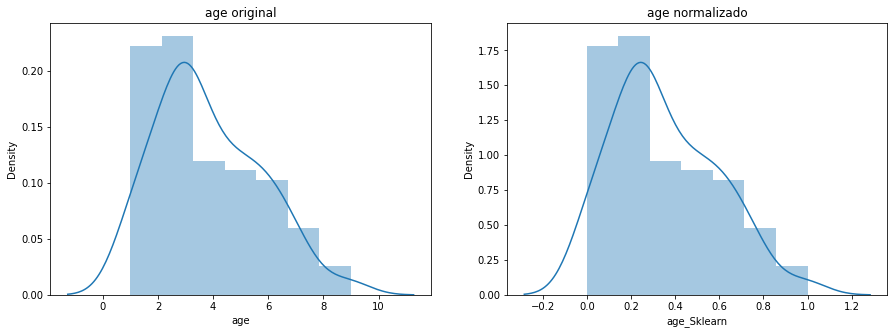

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age original')
axes[1].set_title('age normalizado')

sns.distplot(df['age'] ,ax = axes[0])
sns.distplot(df['age_Sklearn'], ax = axes[1]);

In [30]:
stats.shapiro(df["age_Sklearn"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [31]:
# Aquí está pasando algo coa normalización

In [32]:
df.to_csv("Datos/possum_norm.csv")